<a href="https://colab.research.google.com/github/karnarajrathod/star-tech-academy-code-/blob/main/time_series_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing necessary libraries..

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




#1.. Lets Pre-process our data
Let's read the data from the "GlobalTemperatures.csv" file, 
which has a monthly Earth’s temperature and plot it on the 
chart.


In [5]:
global_temp=pd.read_csv(r'/content/GlobalTemperatures.csv')

In [6]:
global_temp.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


#How to clean/prepare/pre-process data :
a.. remove duplicate rows
b.. remove irrelevant data.
c.. Fix structural errors.
d.. check missing values in data
e.. check data-type of each feature is right or not..
f.. deal with the outliers

In [7]:
global_temp.duplicated().sum()

### ie no duplicated observations we have !

0

In [8]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [9]:
### date-type of 'dt' must be 'Date-time' bcz it holds date-time values..

'''
in date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,
ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

'''

'\nin date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])\ndatetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,\nns is basicaly nano second..\nBoth are similar , it entirely how your numpy was compiled..\n\n'

In [10]:
global_temp['dt'][0]

'1750-01-01'

In [11]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [12]:
global_temp['dt'].dtype

dtype('<M8[ns]')

In [13]:
global_temp['dt'][0]

Timestamp('1750-01-01 00:00:00')

#2.. Does Global Warming exists ?

In [14]:

## extracting year from the 'dt' feature..
global_temp['years']=global_temp['dt'].dt.year

In [16]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [17]:
## finding "avg_LandAverageTemperature" & "avg_LandAverageTemperatureUncertainty" for each of the year..

data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [18]:
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [19]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty'], dtype='object')

In [21]:
  #  Maximum Uncertainty will be Avg temperature  +   deviation(Uncertainty)

 #   whereas minimum Uncertainty will be Avg temp -   deviation(Uncertainty)

   # and this deviation is exactly your Uncertainty...

In [22]:

## so lets create 2 more features as 'Uncertainty_top' & 'Uncertainty_bottom'

data['Uncertainty_top']=data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom']=data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [23]:
data.head(2)

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000


In [24]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],
      dtype='object')

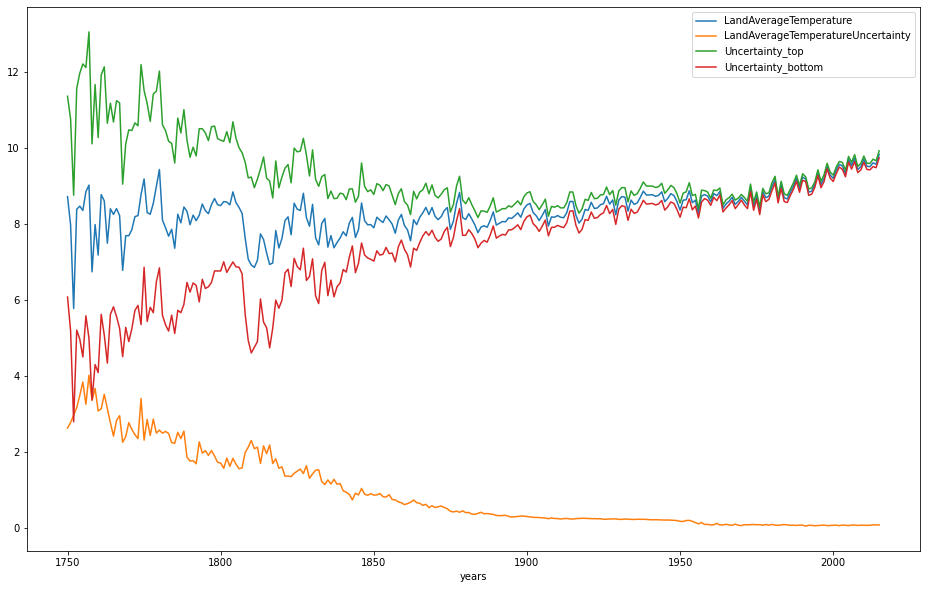

In [25]:
### pandas lineplot :

data.plot(x='years',y=['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],figsize=(16,10))

Conclusion ::  From the charts you can see, that there is global warming nowadays. 
    The average temperature of Earth surface has the highest value in 
    the last three centuries. The fastest temperature growth occurred 
    in the last 30 years! This worries me, I hope soon humanity will 
    fully switch to ecological sources of energy, that will reduce CO2. 
    If it’s will not happened, we will be in disaster. This charts also 
    have confidence intervals, which shows that measurement of temperatur
    e has become more accurate in the last few years.